## Introduction


[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.


## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator` and set it to `GPU`.

In [1]:
!nvidia-smi

Sun Jan  5 08:00:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             27W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install YOLO11 via Ultralytics

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


## Inference with model pre-trained on COCO dataset

### CLI

**NOTE:** CLI requires no customization or Python code. You can simply run all tasks from the terminal with the yolo command.

In [4]:
!yolo task=segment mode=predict model=yolo11s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100%|███████████████████████████████████████| 19.7M/19.7M [00:00<00:00, 136MB/s]
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s-seg summary (fused): 265 layers, 10,097,776 parameters, 0 gradients, 35.5 GFLOPs

100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 70.4MB/s]
image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 2 dogs, 1 backpack, 1 handbag, 102.5ms
Speed: 11.6ms preprocess, 102.5ms inference, 287.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Result annotated image got saved in `{HOME}/runs/detect/predict/`. Let's display it.

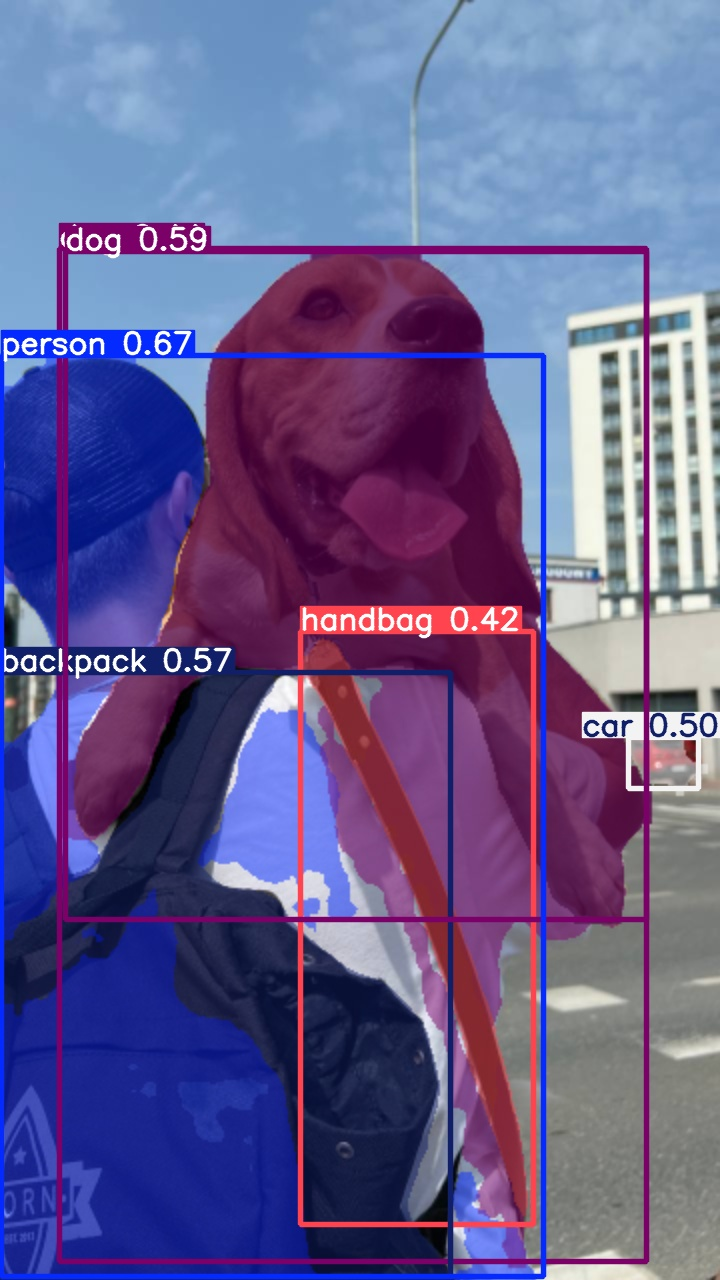

In [5]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/predict/dog.jpg', width=600)

### SDK

**NOTE:** YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

In [6]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11s-seg.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 1 person, 1 car, 2 dogs, 1 backpack, 1 handbag, 73.7ms
Speed: 8.4ms preprocess, 73.7ms inference, 162.8ms postprocess per image at shape (1, 3, 640, 384)


**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

In [7]:
result.boxes.xyxy

tensor([[1.0439e+00, 3.5501e+02, 5.4354e+02, 1.2766e+03],
        [6.5885e+01, 2.5114e+02, 6.4685e+02, 9.1942e+02],
        [0.0000e+00, 6.7253e+02, 4.5094e+02, 1.2792e+03],
        [6.2817e+02, 7.3703e+02, 6.9893e+02, 7.8808e+02],
        [5.9720e+01, 2.4842e+02, 6.4695e+02, 1.2618e+03],
        [3.0094e+02, 6.3192e+02, 5.3370e+02, 1.2246e+03]], device='cuda:0')

In [8]:
result.boxes.conf

tensor([0.6720, 0.5878, 0.5677, 0.4958, 0.4421, 0.4165], device='cuda:0')

In [9]:
result.boxes.cls

tensor([ 0., 16., 24.,  2., 16., 26.], device='cuda:0')

In [10]:
result.masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

**NOTE:** YOLO8 can be easily integrated with `supervision` using the familiar `from_ultralytics` connector.

In [11]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

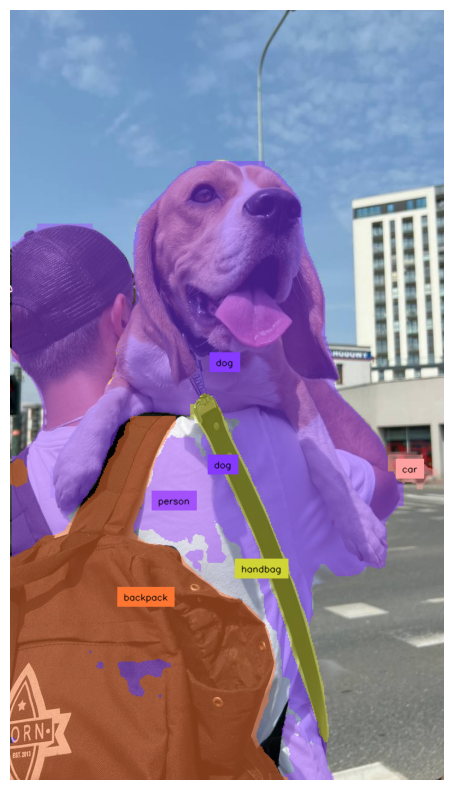

In [12]:
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Fine-tune YOLO11 on River Plastic Waste Dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/ks-fsm9o/pelvis-ap-x-ray) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov8` export format.

In [14]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
ROBOFLOW_API_KEY = user_secrets.get_secret("ROBOFLOW_API_KEY")

In [15]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("project-zero").project("aerial_river_plastic_wastes")
version = project.version(10)
dataset = version.download("yolov11")

/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Aerial_River_Plastic_Wastes-10 in yolov11:: 100%|██████████| 4938/4938 [00:00<00:00, 7622.33it/s]


## Custom Training

Check this link to tweak hyperparameters: https://docs.ultralytics.com/modes/train/#train-settings

In [16]:
%ls

Aerial_River_Plastic_Wastes-10/


In [17]:
%cd ..

/kaggle/working


In [18]:
%mkdir yolo11

In [19]:
%cd ./yolo11/

!yolo task=segment mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=50 plots=True batch=16 device=0 save=True imgsz=640

/kaggle/working/yolo11
100%|███████████████████████████████████████| 19.7M/19.7M [00:00<00:00, 232MB/s]
New https://pypi.org/project/ultralytics/8.3.57 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/kaggle/working/datasets/Aerial_River_Plastic_Wastes-10/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, 

**NOTE:** The results of the completed training are saved in `./yolo11/runs/segment/train/`. Let's examine them.

In [20]:
!ls

runs  yolo11n.pt  yolo11s-seg.pt


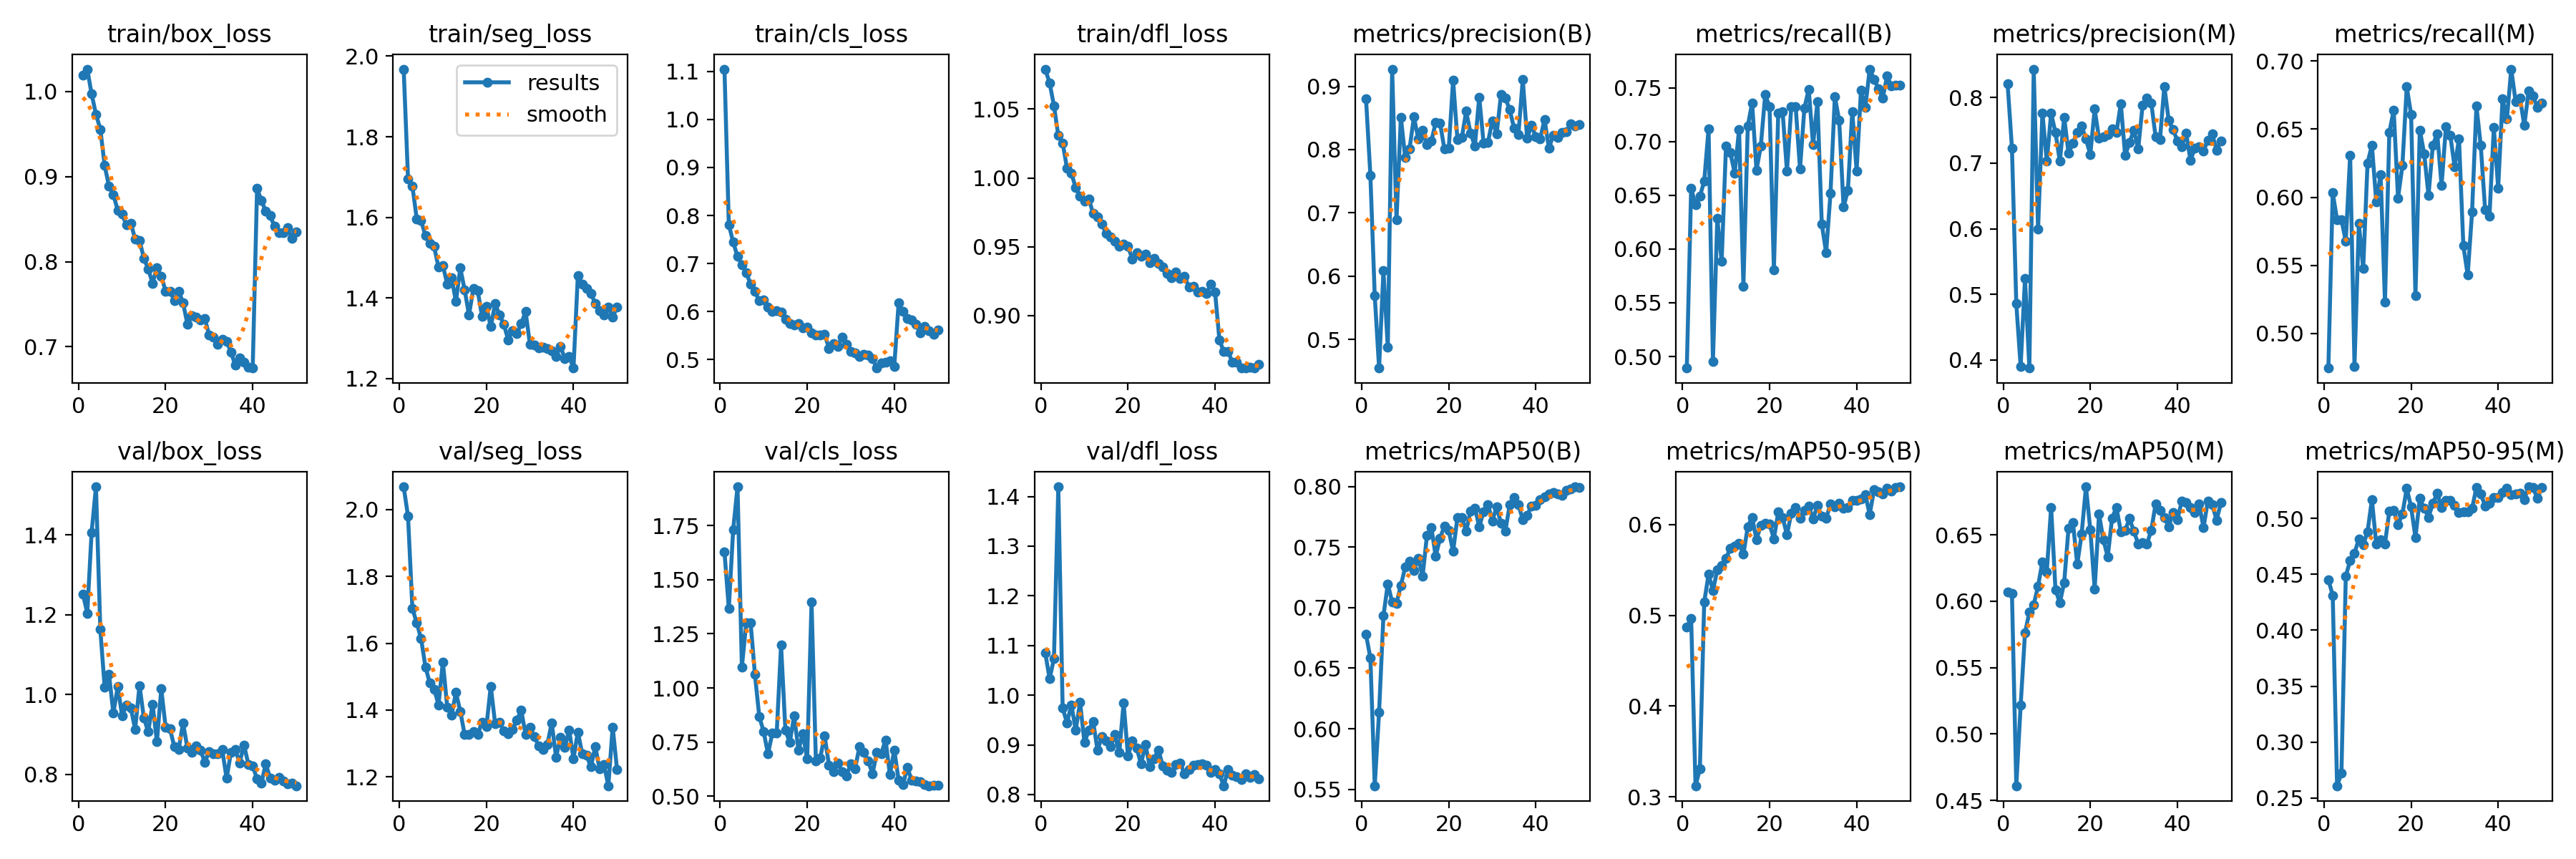

In [21]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'./runs/segment/train/results.png')

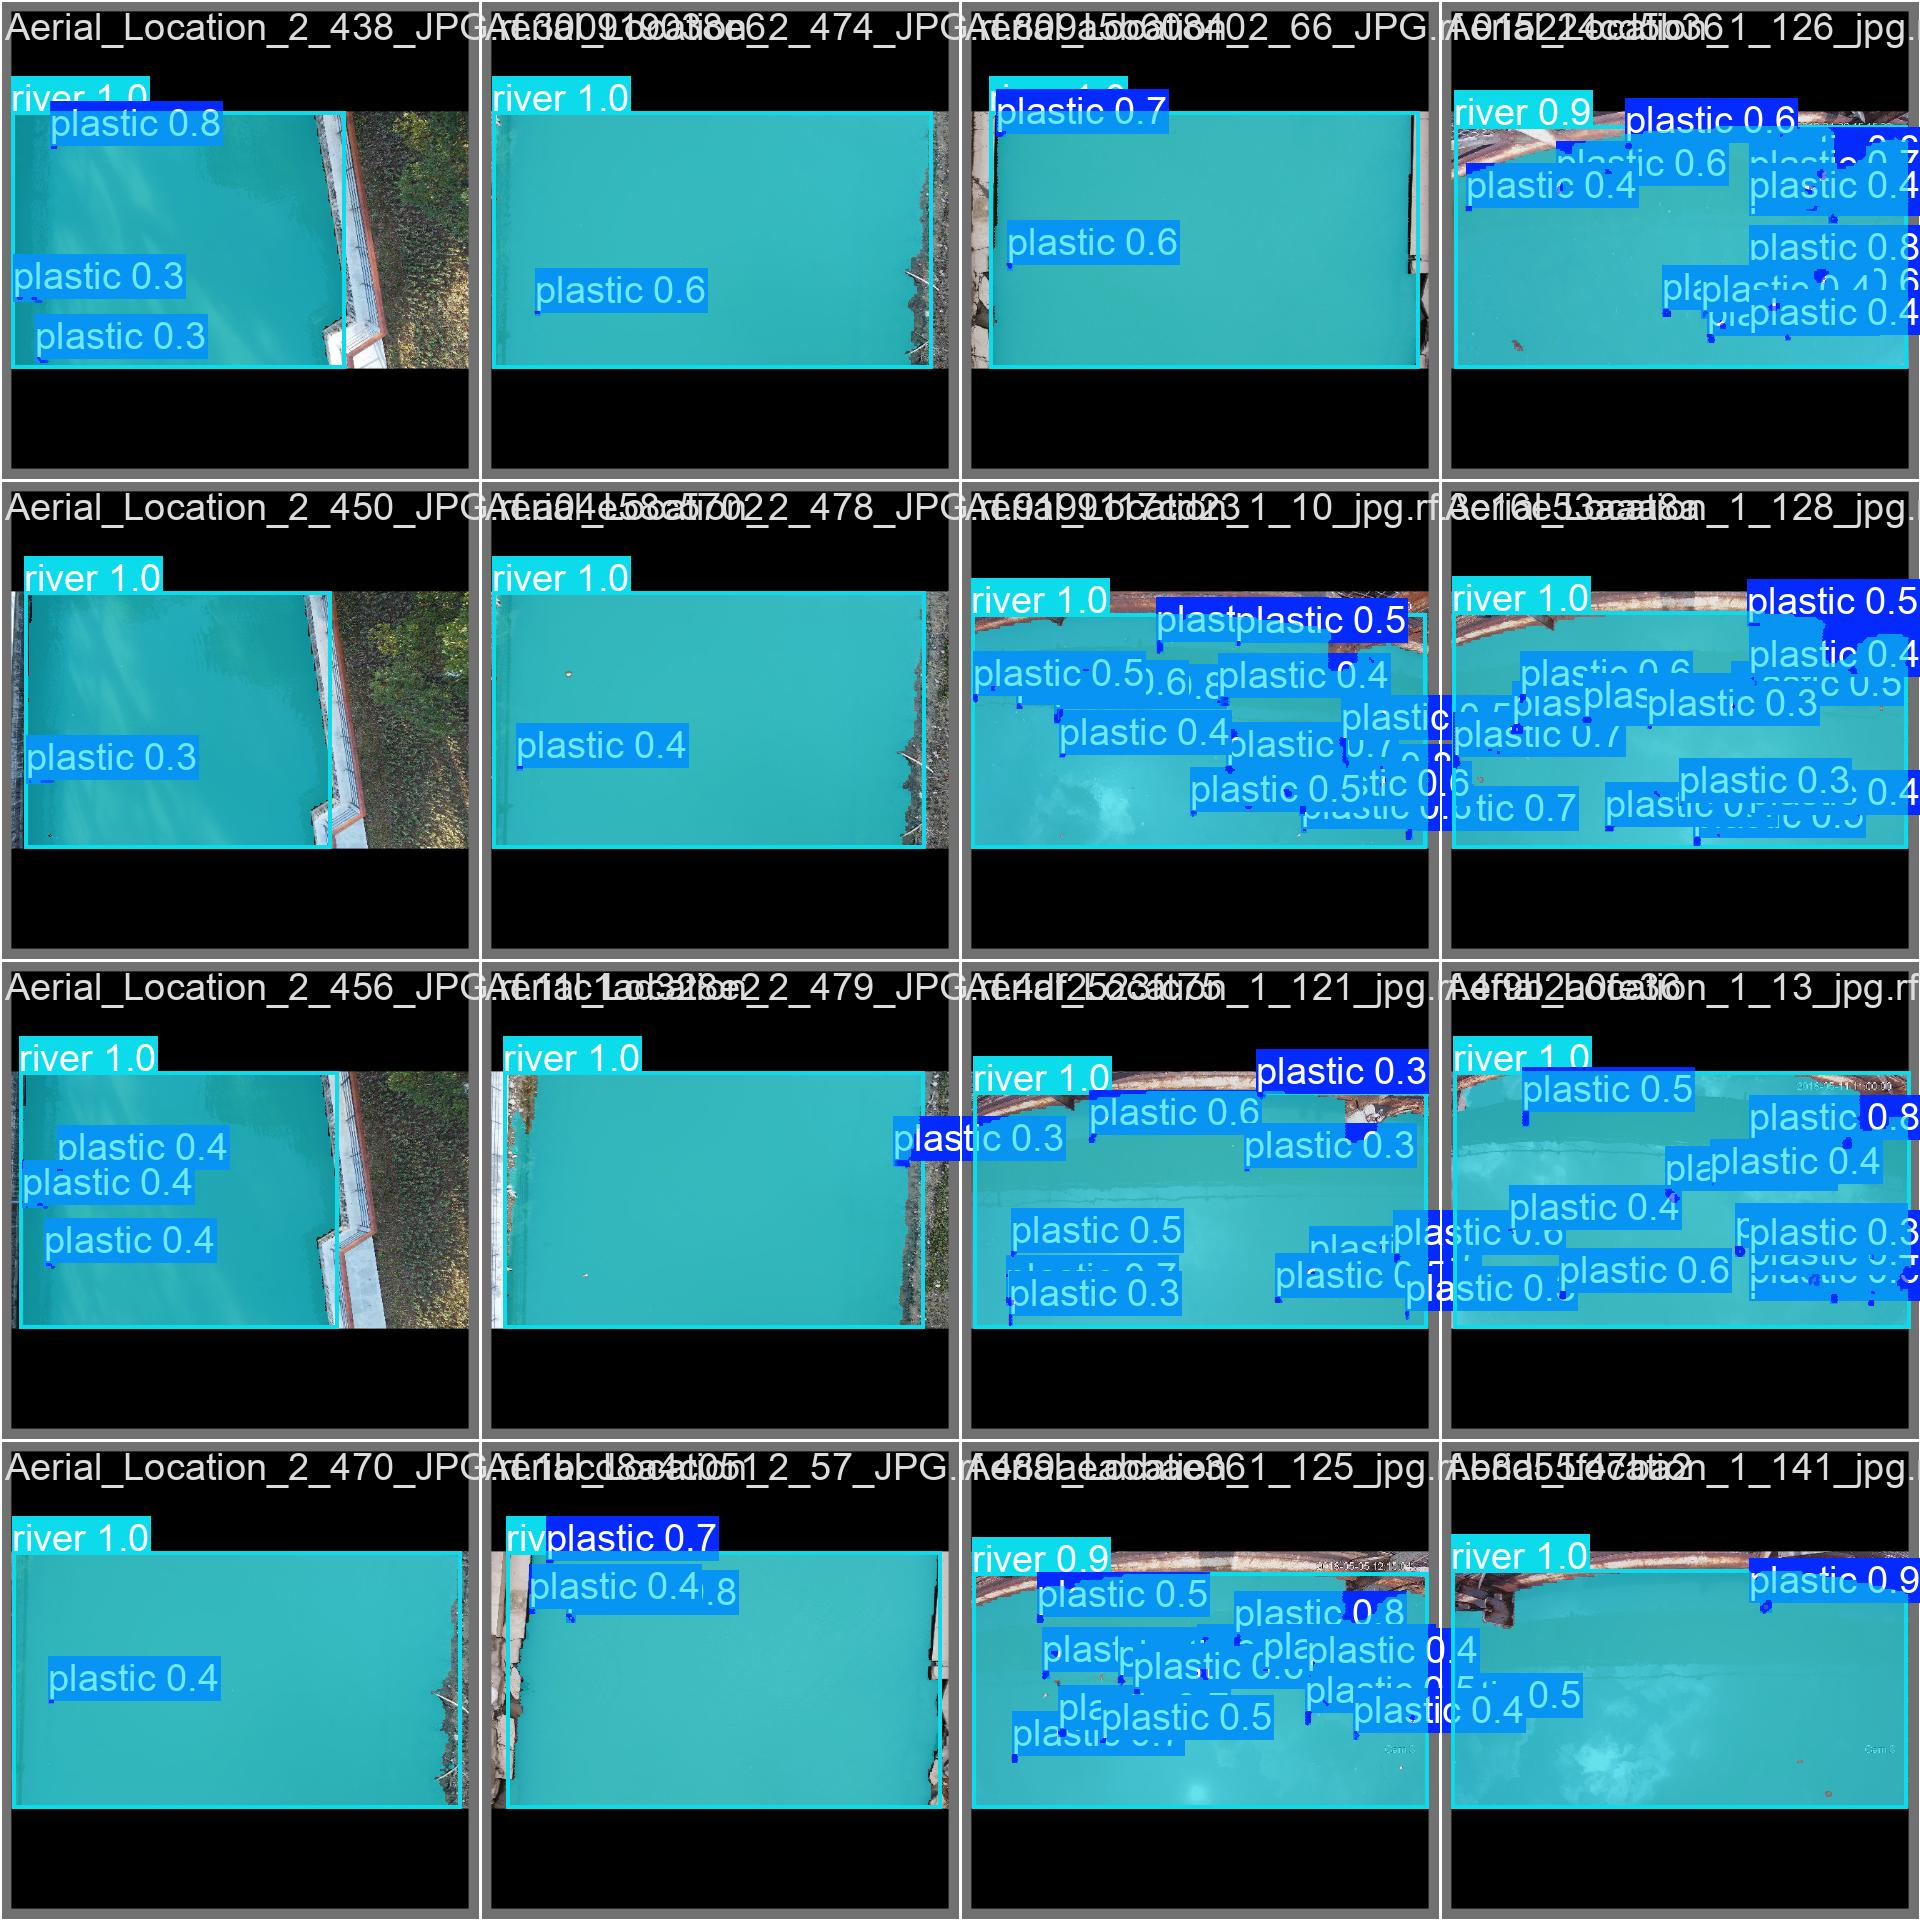

In [22]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'./runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [23]:
!yolo task=segment mode=val model=./runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /kaggle/working/datasets/Aerial_River_Plastic_Wastes-10/valid/labe
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         94       1049      0.818      0.751      0.798      0.646      0.721      0.661      0.662       0.52
               plastic         93        942      0.716      0.577      0.661      0.383      0.519      0.397       0.39      0.135
                 river         92        107       0.92      0.925      0.934      0.909      0.922      0.925      0.934      0.904
Speed: 3.3ms preprocess, 7.9ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

In [24]:
%ls

runs/  yolo11n.pt  yolo11s-seg.pt


In [25]:
!yolo task=segment mode=predict model=./runs/segment/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs

image 1/95 /kaggle/working/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_108_jpg.rf.0cd592574b46ddf6aa2e71c6b5240fc1.jpg: 640x640 3 plastics, 1 river, 11.6ms
image 2/95 /kaggle/working/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_120_jpg.rf.e14b0782d7d1057f187c3885b9101ed2.jpg: 640x640 6 plastics, 1 river, 10.0ms
image 3/95 /kaggle/working/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_122_jpg.rf.a3450937e6d66ebea12a3d53b9c70b1b.jpg: 640x640 4 plastics, 1 river, 9.9ms
image 4/95 /kaggle/working/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_153_jpg.rf.d6f4c6202d61c3e837f0b2c990e62e08.jpg: 640x640 7 plastics, 1 river, 10.0ms
image 5/95 /kaggle/working/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Loc

**Let's take a look at few results.**

In [26]:
%ls

runs/  yolo11n.pt  yolo11s-seg.pt


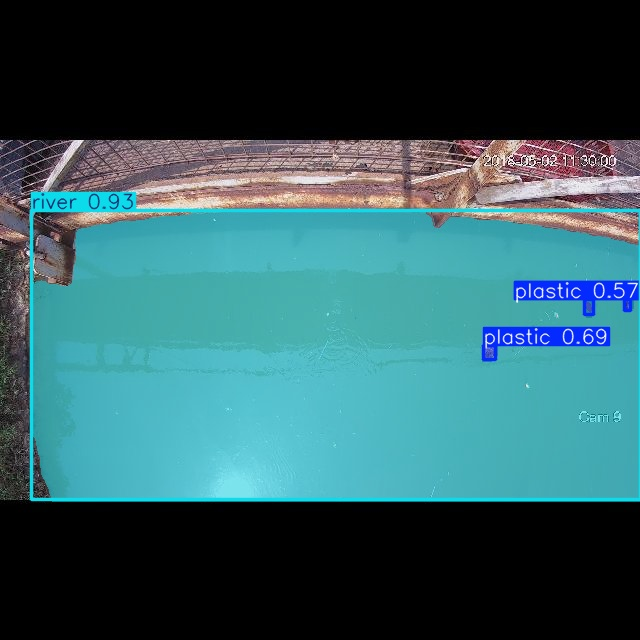

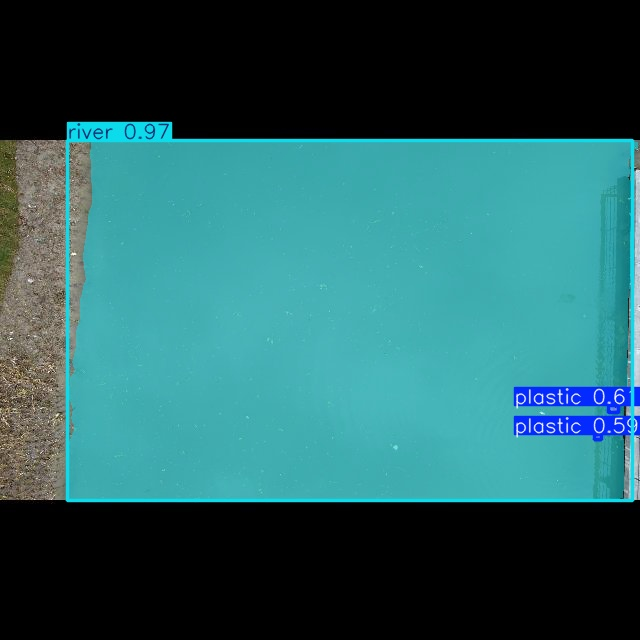

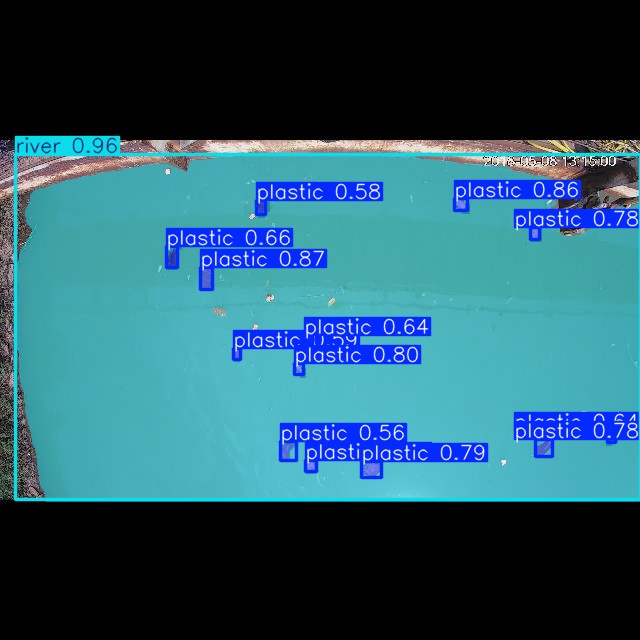

In [27]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'./runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=640))
    print("\n")

## Downloading The results

In [28]:
%ls

runs/  yolo11n.pt  yolo11s-seg.pt


In [29]:
import shutil

%cd ..
shutil.make_archive("1_yolo11_result", 'zip', "./yolo11")

/kaggle/working


'/kaggle/working/1_yolo11_result.zip'